# Network Dynamics and Graph - Politecnico di Torino - Hafez Ghaemi - S289963
## HW1 - Exercise 1

In [30]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 

## Part a

### Creating and drawing the graph

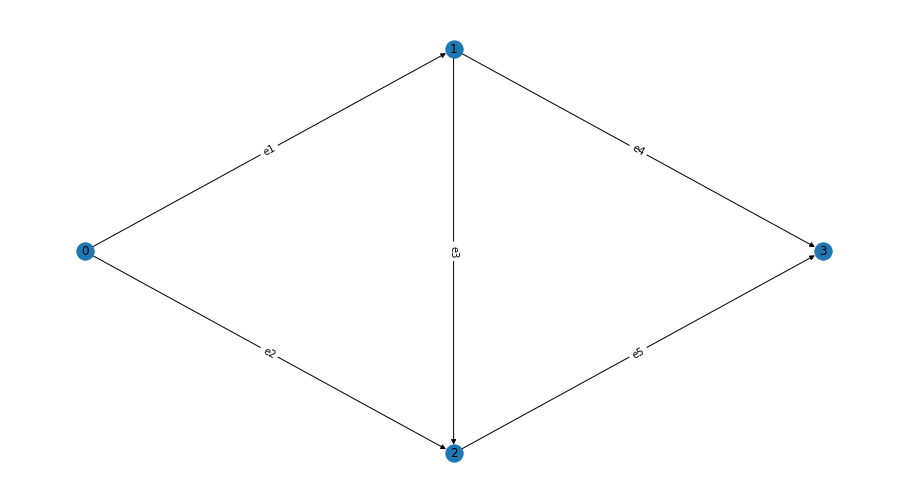

In [3]:
caps = np.array([3,2,2,3,2])

G = nx.DiGraph() 
G.add_edge(0, 1, weight=3)
G.add_edge(0, 2, weight=2)
G.add_edge(1, 2, weight=2)
G.add_edge(1, 3, weight=3)
G.add_edge(2, 3, weight=2)

pos = {0:[0,0], 1:[1,1], 2:[1,-1], 3:[2,0]} 


edge_labels = {(0,1): 'e1',(0,2): 'e2',(1,2): 'e3',(1,3): 'e4',(2,3): 'e5'}
f = plt.figure(figsize=(16,9))

nx.draw(G,pos, with_labels=True, ax=f.add_subplot(111))
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

f.savefig("graphQ1.pdf", format='pdf')


### Calculating the total capacity to be removed (also the maximal thoroughput formula)

In [16]:
inf_cap = lambda c1, c2, c3, c4, c5: min(c1+c2, c1+c5, c4+c5, c2+c3+c4)


## Part b

In [27]:
### Trying all combinations for adding one unit of capacity to a link
from itertools import combinations
import copy
e = [0, 1, 2, 3, 4]
combs1 = combinations(e, 1)
max_flow = -1
max_flow_caps = copy.deepcopy(caps)

for comb in list(combs1):
    new_caps = copy.deepcopy(caps)
    new_caps[comb[0]] += 1
    inf_cap_new = inf_cap(*new_caps)
    if inf_cap_new > max_flow:
        max_flow = inf_cap_new
        max_flow_caps = new_caps

print(f"The original capacities: {caps}, the original maximum thoroughput: {inf_cap(3,2,2,3,2)}")
print(f'The new optimal capacities: {max_flow_caps}, new maximum thoroughput: {max_flow}')

The original capacities: [3 2 2 3 2], the original maximum thoroughput: 5
The new optimal capacities: [4 2 2 3 2], new maximum thoroughput: 5


# Part c

In [28]:
### Trying all combinations for adding 2 units of capacities to one link
combs2 = combinations(e, 1)
max_flow = -1
max_flow_caps = copy.deepcopy(caps)

for comb in list(combs2):
    new_caps = copy.deepcopy(caps)
    new_caps[comb[0]] += 2
    inf_cap_new = inf_cap(*new_caps)
    if inf_cap_new > max_flow:
        max_flow = inf_cap_new
        max_flow_caps = new_caps

### Trying all combinations for adding two units of capacities to two links
combs11 = combinations(e, 2)
for comb in list(combs11):
    new_caps = copy.deepcopy(caps)
    new_caps[comb[0]] += 1
    new_caps[comb[1]] += 1
    inf_cap_new = inf_cap(*new_caps)
    if inf_cap_new > max_flow:
        max_flow = inf_cap_new
        max_flow_caps = new_caps

print(f"The original capacities: {caps}, the original maximum thoroughput: {inf_cap(3,2,2,3,2)}")
print(f'The new optimal capacities: {max_flow_caps}, new maximum thoroughput: {max_flow}')


The original capacities: [3 2 2 3 2], the original maximum thoroughput: 5
The new optimal capacities: [4 2 2 4 2], new maximum thoroughput: 6


# Part d

In [29]:
max_flow = -1
max_flow_caps = copy.deepcopy(caps)

### Trying all possibilities for adding 4 units of capacities to different combinations of links

combs1111 = combinations(e, 4)
for comb in list(combs1111):
    new_caps = copy.deepcopy(caps)
    new_caps[comb[0]] += 1
    new_caps[comb[1]] += 1
    new_caps[comb[2]] += 1
    new_caps[comb[3]] += 1
    inf_cap_new = inf_cap(*new_caps)
    if inf_cap_new > max_flow:
        max_flow = inf_cap_new
        max_flow_caps = new_caps

combs4 = combinations(e, 1)
for comb in list(combs4):
    new_caps = copy.deepcopy(caps)
    new_caps[comb[0]] += 4
    inf_cap_new = inf_cap(*new_caps)
    if inf_cap_new > max_flow:
        max_flow = inf_cap_new
        max_flow_caps = new_caps

combs22 = combinations(e, 2)
for comb in list(combs22):
    new_caps = copy.deepcopy(caps)
    new_caps[comb[0]] += 2
    new_caps[comb[1]] += 2

    inf_cap_new = inf_cap(*new_caps)
    if inf_cap_new > max_flow:
        max_flow = inf_cap_new
        max_flow_caps = new_caps

combs13 = combinations(e, 2)
for comb in list(combs13):
    comb_tmp = list(combinations(comb, 1))
    for c in comb_tmp:
        new_caps = copy.deepcopy(caps)
        new_caps[c] += 3
        comb_ = list(comb)
        comb_.remove(c[0])
        new_caps[comb_[0]] += 1
        inf_cap_new = inf_cap(*new_caps)
        if inf_cap_new > max_flow:
            max_flow = inf_cap_new
            max_flow_caps = new_caps

combs121 = combinations(e, 3)
for comb in list(combs121):
    comb_tmp = list(combinations(comb, 1))
    for c in comb_tmp:
        new_caps = copy.deepcopy(caps)
        new_caps[c] += 2
        comb_ = list(comb)
        comb_.remove(c[0])
        new_caps[comb_[0]] += 1
        new_caps[comb_[1]] += 1

        inf_cap_new = inf_cap(*new_caps)
        if inf_cap_new > max_flow:
            max_flow = inf_cap_new
            max_flow_caps = new_caps
            
print(f"The original capacities: {caps}, the original maximum thoroughput: {inf_cap(3,2,2,3,2)}")
print(f'The new optimal capacities: {max_flow_caps}, new maximum thoroughput: {max_flow}')

The original capacities: [3 2 2 3 2], the original maximum thoroughput: 5
The new optimal capacities: [4 3 2 4 3], new maximum thoroughput: 7
